(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.3772 - val_loss: 0.1857
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1766 - val_loss: 0.1521
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1480 - val_loss: 0.1327
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1306 - val_loss: 0.1207
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1199 - val_loss: 0.1131
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1128 - val_loss: 0.1075
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1075 - val_loss: 0.1031
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1036 - val_loss: 0.0998
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1003 - val_loss: 0.0975
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss:

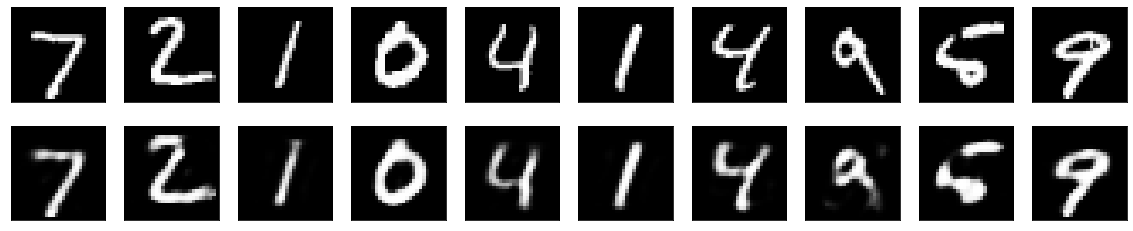

In [1]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

(60000, 784)
(10000, 784)
Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3884 - val_loss: 0.1994
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1897 - val_loss: 0.1624
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1584 - val_loss: 0.1443
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1422 - val_loss: 0.1331
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1320 - val_loss: 0.1248
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1248 - val_loss: 0.1190
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1189 - val_loss: 0.1147
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1152 - val_loss: 0.1117
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1121 - val_loss: 0.1091
Epoch 10/100
235/235 [==============================] - 1s 3ms/st

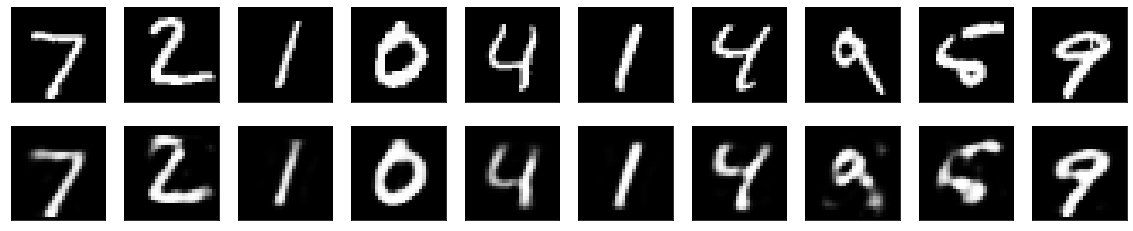

In [3]:
%run AutoEncoder.py

In [5]:
%run AutoEncoder.py

ValueError: Dimensions must be equal, but are 32 and 128 for '{{node dense_17/MatMul}} = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false](Placeholder, dense_17/MatMul/ReadVariableOp)' with input shapes: [?,32], [128,784].

(60000, 784)
(10000, 784)
Epoch 1/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3942 - val_loss: 0.2003
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1897 - val_loss: 0.1634
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1587 - val_loss: 0.1424
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1406 - val_loss: 0.1302
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1294 - val_loss: 0.1221
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1221 - val_loss: 0.1162
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1165 - val_loss: 0.1123
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1127 - val_loss: 0.1096
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1103 - val_loss: 0.1078
Epoch 10/100
235/235 [==============================] - 1s 3ms/st

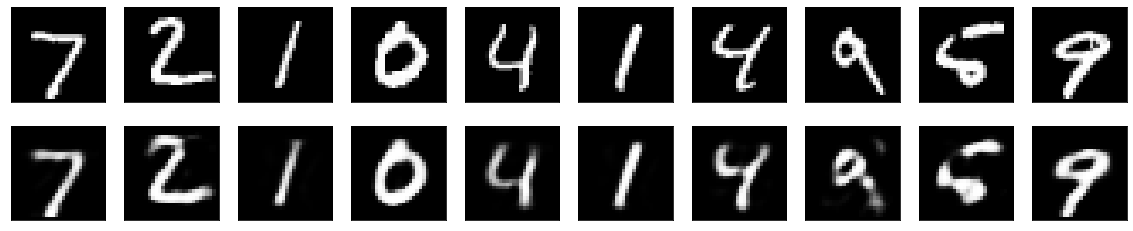

In [6]:
%run AutoEncoder.py

In [17]:
%run AutoEncoder.py

SyntaxError: invalid syntax (AutoEncoder.py, line 5)

In [22]:
%run AutoEncoder.py

(60000, 784)
(10000, 784)
Epoch 1/100
235/235 [==============================] - 1s 5ms/step - loss: 0.3318 - val_loss: 0.1638
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1536 - val_loss: 0.1328
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1315 - val_loss: 0.1225
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1219 - val_loss: 0.1167
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1157 - val_loss: 0.1102
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1107 - val_loss: 0.1062
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1067 - val_loss: 0.1033
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1039 - val_loss: 0.1015
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1020 - val_loss: 0.0999
Epoch 10/100
235/235 [==============================] - 1s 5ms/st

KeyboardInterrupt: 

In [39]:
%run AutoEncoder.py

ValueError: Dimensions must be equal, but are 32 and 128 for '{{node dense_210/MatMul}} = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false](Placeholder, dense_210/MatMul/ReadVariableOp)' with input shapes: [?,32], [128,784].

In [40]:
%run AutoEncoder.py

ValueError: Dimensions must be equal, but are 32 and 128 for '{{node dense_216/MatMul}} = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false](Placeholder, dense_216/MatMul/ReadVariableOp)' with input shapes: [?,32], [128,784].

In [41]:
%run AutoEncoder.py

ValueError: Dimensions must be equal, but are 32 and 128 for '{{node dense_222/MatMul}} = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false](Placeholder, dense_222/MatMul/ReadVariableOp)' with input shapes: [?,32], [128,784].

In [42]:
%run AutoEncoder.py

TypeError: Dimension value must be integer or None or have an __index__ method, got value '(32, 128)' with type '<class 'tuple'>'

In [43]:
%run AutoEncoder.py

SyntaxError: invalid syntax (AutoEncoder.py, line 8)

In [44]:
%run AutoEncoder.py\

(60000, 784)
(10000, 784)
Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3336 - val_loss: 0.1676
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1623 - val_loss: 0.1395
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1365 - val_loss: 0.1268
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1260 - val_loss: 0.1191
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1189 - val_loss: 0.1124
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1130 - val_loss: 0.1088
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1097 - val_loss: 0.1064
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1071 - val_loss: 0.1042
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1049 - val_loss: 0.1028
Epoch 10/100
235/235 [==============================] - 1s 4ms/st

ValueError: in user code:

    /home/endington/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /home/endington/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/endington/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/endington/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/endington/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/endington/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /home/endington/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /home/endington/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/endington/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model_90: expected shape=(None, 128), found shape=(None, 32)


In [45]:
%run AutoEncoder.py

(60000, 784)
(10000, 784)
Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.3395 - val_loss: 0.1663
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1579 - val_loss: 0.1354
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1333 - val_loss: 0.1226
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1222 - val_loss: 0.1146
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1153 - val_loss: 0.1097
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1098 - val_loss: 0.1069
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1071 - val_loss: 0.1039
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1043 - val_loss: 0.1016
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1023 - val_loss: 0.1003
Epoch 10/100
235/235 [==============================] - 1s 4ms/st

NameError: name 'decoded_imgs' is not defined

In [48]:
%run AutoEncoder.py

ValueError: Dimensions must be equal, but are 128 and 64 for '{{node dense_257/MatMul}} = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false](Placeholder, dense_257/MatMul/ReadVariableOp)' with input shapes: [?,128], [64,128].

In [6]:
%run AutoEncoder.py

(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.3378 - val_loss: 0.1620
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1531 - val_loss: 0.1333
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1316 - val_loss: 0.1230
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1225 - val_loss: 0.1152
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1153 - val_loss: 0.1101
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1104 - val_loss: 0.1067
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1069 - val_loss: 0.1036
Epoch 8/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1044 - val_loss: 0.1018
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1023 - val_loss: 0.1000
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss:

NameError: name 'genfromtxt' is not defined

In [5]:
%run AutoEncoder.py

(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.3428 - val_loss: 0.1663
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1559 - val_loss: 0.1349
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1331 - val_loss: 0.1226
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1225 - val_loss: 0.1165
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1167 - val_loss: 0.1117
Epoch 6/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1122 - val_loss: 0.1081
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1082 - val_loss: 0.1048
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1055 - val_loss: 0.1026
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1032 - val_loss: 0.1007
Epoch 10/50
235/235 [==============================] - 2s 6ms/step - loss:

ValueError: in user code:

    /home/endington/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /home/endington/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/endington/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/endington/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/endington/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/endington/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /home/endington/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /home/endington/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/endington/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model_11: expected shape=(None, 32), found shape=(None, 64)


In [7]:
%run AutoEncoder.py

(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.3410 - val_loss: 0.1598
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1535 - val_loss: 0.1374
Epoch 3/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1349 - val_loss: 0.1247
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1244 - val_loss: 0.1171
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1176 - val_loss: 0.1116
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1116 - val_loss: 0.1071
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1078 - val_loss: 0.1051
Epoch 8/50
235/235 [==============================] - 2s 6ms/step - loss: 0.1055 - val_loss: 0.1026
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1033 - val_loss: 0.1014
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss:

NameError: name 'genfromtxt' is not defined

In [8]:
%run AutoEncoder.py

(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.3450 - val_loss: 0.1670
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1573 - val_loss: 0.1366
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1344 - val_loss: 0.1244
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1239 - val_loss: 0.1178
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1179 - val_loss: 0.1138
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1126 - val_loss: 0.1075
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1079 - val_loss: 0.1047
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1055 - val_loss: 0.1027
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1032 - val_loss: 0.1007
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss:

NameError: name 'matplotlib' is not defined

In [9]:
%run AutoEncoder.py

(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.3373 - val_loss: 0.1733
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1637 - val_loss: 0.1411
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1390 - val_loss: 0.1283
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1279 - val_loss: 0.1196
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1200 - val_loss: 0.1137
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1140 - val_loss: 0.1098
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1108 - val_loss: 0.1069
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1077 - val_loss: 0.1044
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1053 - val_loss: 0.1023
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss:

AttributeError: module 'matplotlib.pyplot' has no attribute 'image'

(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.3384 - val_loss: 0.1678
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1604 - val_loss: 0.1380
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1361 - val_loss: 0.1273
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1266 - val_loss: 0.1196
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1197 - val_loss: 0.1141
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1146 - val_loss: 0.1104
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1111 - val_loss: 0.1078
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1083 - val_loss: 0.1065
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1065 - val_loss: 0.1038
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss:

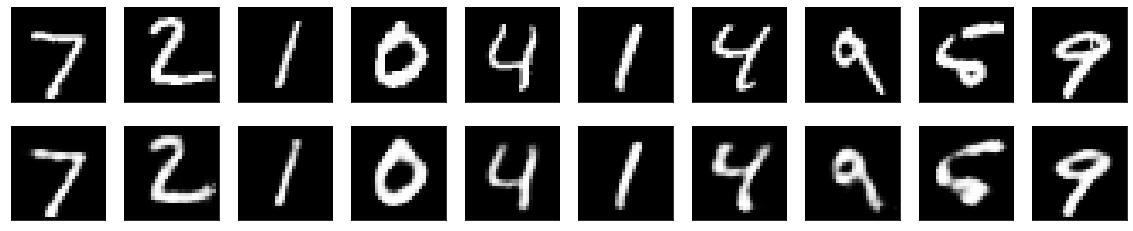

ValueError: cannot reshape array of size 32 into shape (4,32)

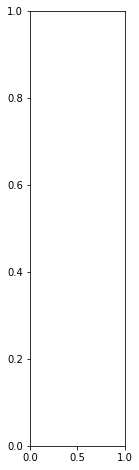

In [1]:
%run AutoEncoder.py

(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.3410 - val_loss: 0.1668
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1568 - val_loss: 0.1357
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1340 - val_loss: 0.1249
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1237 - val_loss: 0.1170
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1166 - val_loss: 0.1116
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1120 - val_loss: 0.1076
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1084 - val_loss: 0.1049
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1055 - val_loss: 0.1029
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1037 - val_loss: 0.1014
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss:

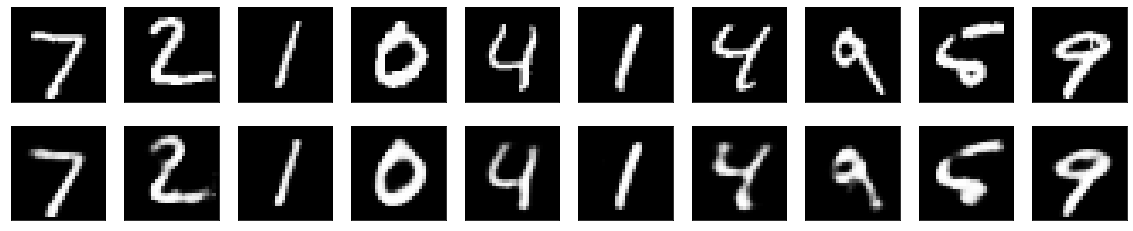

ValueError: cannot reshape array of size 32 into shape (4,32)

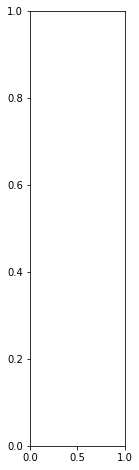

In [2]:
%run AutoEncoder.py

In [1]:
%run AutoEncoder.py

(60000, 784)
(10000, 784)
Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.3457 - val_loss: 0.1648
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1562 - val_loss: 0.1350
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1328 - val_loss: 0.1227
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1218 - val_loss: 0.1152
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1151 - val_loss: 0.1100
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1106 - val_loss: 0.1070
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1073 - val_loss: 0.1037
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1042 - val_loss: 0.1015
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1019 - val_loss: 0.0996
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss:

KeyboardInterrupt: 